In [13]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = df.drop(['Id'], axis=1)

numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = make_pipeline(SimpleImputer(), StandardScaler())

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse_output=False)
)

preprocessor = make_column_transformer(
    (numeric_transformer, numerical_ix),
    (categorical_transformer, categorical_ix),
    verbose_feature_names_out=False,
).set_output(transform="pandas")

df = preprocessor.fit_transform(df)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


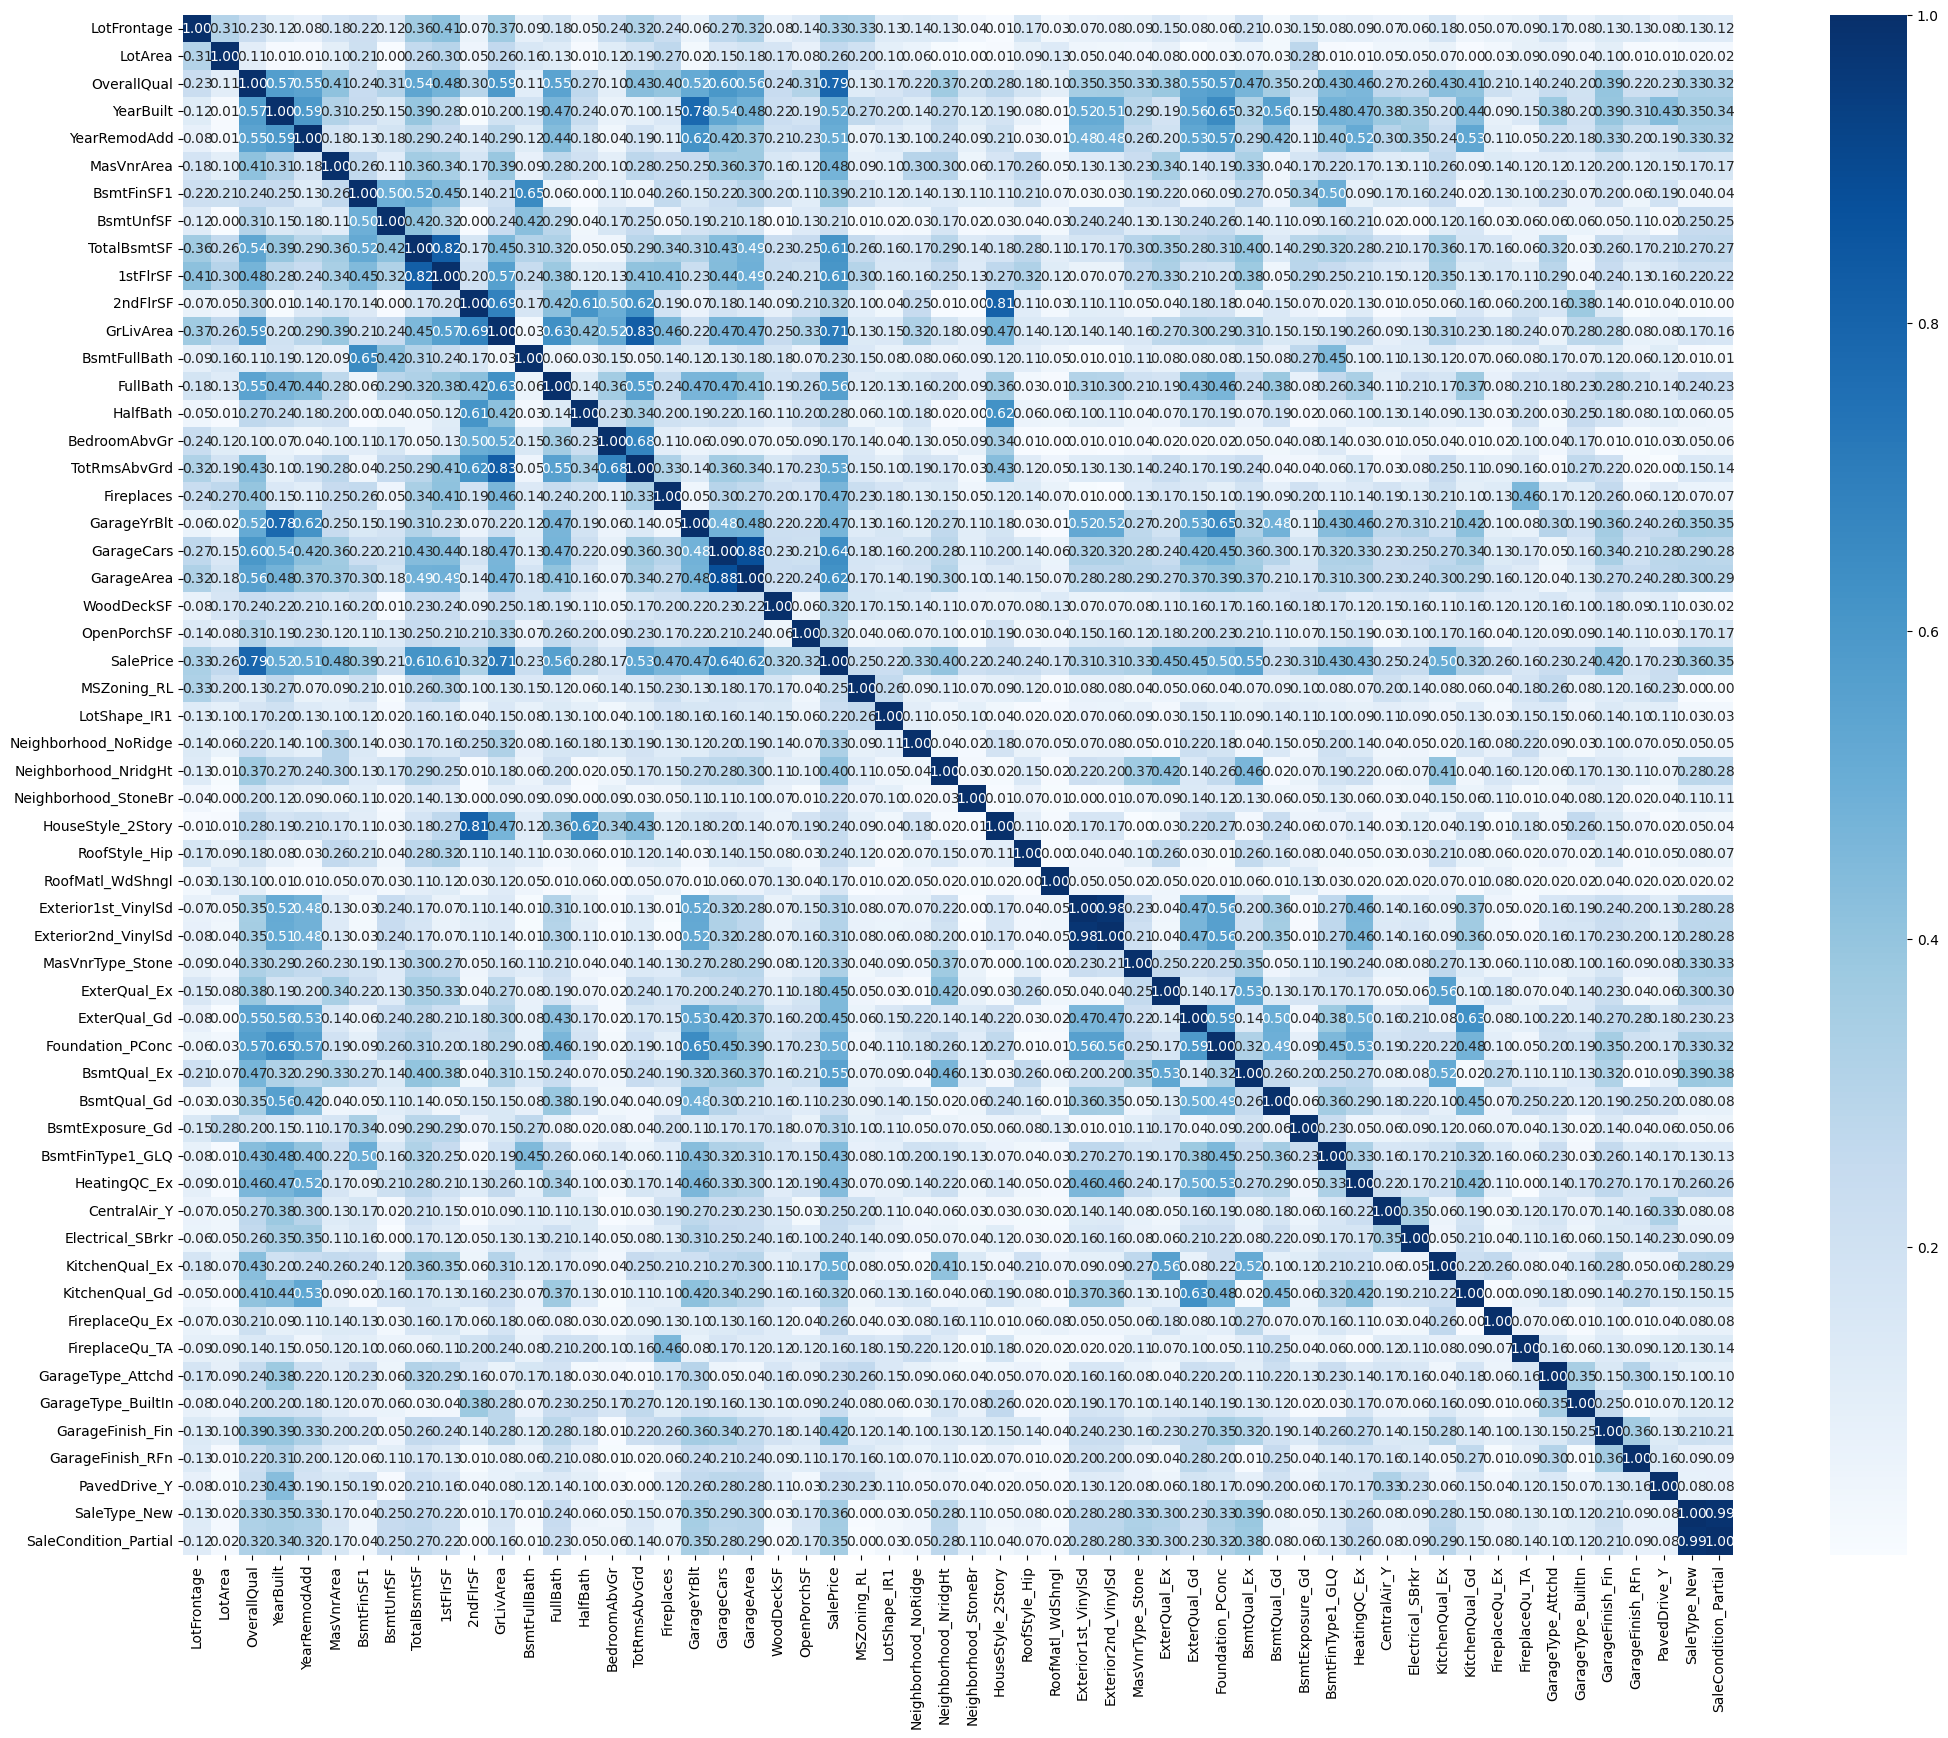

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenQual_Gd,FireplaceQu_Ex,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,PavedDrive_Y,SaleType_New,SaleCondition_Partial
0,-0.229372,-0.207142,0.651479,1.050994,0.878668,0.511418,0.575425,-0.944591,-0.459303,-0.793434,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.451936,-0.091886,-0.071836,0.156734,-0.429577,-0.574410,1.171992,-0.641228,0.466465,0.257140,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.093110,0.073480,0.651479,0.984752,0.830215,0.323060,0.092907,-0.301643,-0.313369,-0.627826,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.456474,-0.096897,0.651479,-1.863632,-0.720298,-0.574410,-0.499274,-0.061670,-0.687324,-0.521734,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.633618,0.375148,1.374795,0.951632,0.733308,1.364570,0.463568,-0.174865,0.199680,-0.045611,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.365633,-0.260560,-0.071836,0.918511,0.733308,-0.574410,-0.973018,0.873321,-0.238122,-0.542435,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1456,0.679039,0.266407,-0.071836,0.222975,0.151865,0.084843,0.759659,0.049262,1.104925,2.355701,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,-0.183951,-0.147810,0.651479,-1.002492,1.024029,-0.574410,-0.369871,0.701265,0.215641,0.065656,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1458,-0.093110,-0.080160,-0.795151,-0.704406,0.539493,-0.574410,-0.865548,-1.284176,0.046905,-0.218982,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
import numpy as np


subset_corr_input_features = []
for column in df.columns:
    if np.corrcoef(df['SalePrice'],df[column])[0,1]>0.15:
        subset_corr_input_features.append(column)

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(np.abs(df[subset_corr_input_features].corr()), annot = True, fmt = ".2f", \
cmap="Blues")
plt.show()

for i in subset_corr_input_features:
    new_df = df[subset_corr_input_features]
new_df

In [17]:
y = df["SalePrice"]
X = df.drop(['SalePrice'], axis=1)

In [18]:
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

In [19]:
from sklearn.metrics import r2_score


score = r2_score(y, predictions)
print(score)

0.9320365457946135
